In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing data

df = pd.read_csv(r'C:\Users\USER\Desktop\packt\ML projects\CODES\2. Multiple Linear Regression\Multiple_Linear_Regression\Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Encoding factor level 2 categorical data
df['mainroad'] = df['mainroad'].map({'yes':1 , 'no':0})
df['guestroom'] = df['guestroom'].map({'yes':1 , 'no':0})
df['basement'] = df['basement'].map({'yes':1 , 'no':0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1 , 'no':0})
df['airconditioning'] = df['airconditioning'].map({'yes':1 , 'no':0})
df['prefarea'] = df['prefarea'].map({'yes':1 , 'no':0})

In [4]:
# Encoding factor level 3 categorical data

print(df['furnishingstatus'].value_counts()) # Check for factor level

x = pd.get_dummies(df['furnishingstatus'],drop_first=True)  # Creating dummy varibles

df.drop('furnishingstatus',inplace=True,axis=1)  # Removing main feature as it is encoded 
df = pd.concat([x,df],axis=1)  # concatenating x and df
df.head()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64


,semi-furnished,unfurnished,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,0,0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,0,0,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,1,0,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,0,0,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,0,0,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [5]:
# Standardizing the data
# Z = X - X.mean() / X.std()
    

def stand(x):
    return (x - x.mean())/x.std() 

df = df.apply(stand)
df.head()

,semi-furnished,unfurnished,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,-0.844113,-0.69579,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284
1,-0.844113,-0.69579,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526
2,1.182502,-0.69579,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284
3,-0.844113,-0.69579,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284
4,-0.844113,-0.69579,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526


In [6]:
# Considering 1 feature for X

X = np.array(df['area'])
y = np.array(df['price'])

In [7]:
# Implementing gradient descent on SLR

def gradient(X, y, m_current=0, c_current=0, iters=1000, learning_rate=0.01):
    N = float(len(y))
    gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])
    for i in range(iters):
        y_current = (m_current * X) + c_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        c_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        c_current = c_current - (learning_rate * c_gradient)
        gd_df.loc[i] = [m_current,c_current,cost]
    return(gd_df)


In [11]:
grad = gradient(X,y)

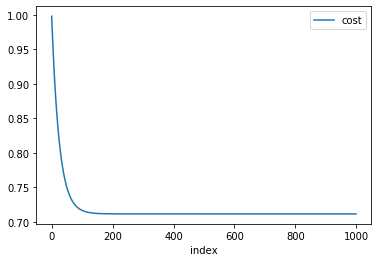

In [12]:
grad.reset_index().plot.line(x = 'index',y = ['cost'])